## Sample VQE quantum circuit for Mixed field Ising model with one HVA ansatz layer. 

In [1]:
# Essential imports for the calculations
import qiskit
from qiskit import QuantumCircuit, Aer, transpile, ClassicalRegister
from qiskit.visualization import plot_gate_map, plot_error_map, plot_histogram
from qiskit.providers.fake_provider import FakeQuitoV2
from matplotlib import pyplot as plt
import sys
import numpy as np


In [2]:
print(qiskit.__qiskit_version__)

{'qiskit': '0.45.1', 'qiskit-aer': '0.13.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': None, 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}


/tmp/ipykernel_173066/885274137.py:1: DeprecationWarning: qiskit.__qiskit_version__ is deprecated since Qiskit Terra 0.25.0, and will be removed 3 months or more later. Instead, you should use qiskit.__version__. The other packages listed in theformer qiskit.__qiskit_version__ have their own __version__ module level dunder, as standard in PEP 8.
  print(qiskit.__qiskit_version__)


Install qiskit. The notebook is prepared in the version as shown in cell above.

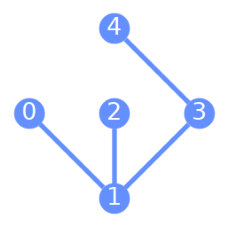

In [4]:
backend = FakeQuitoV2()
plot_gate_map(backend)


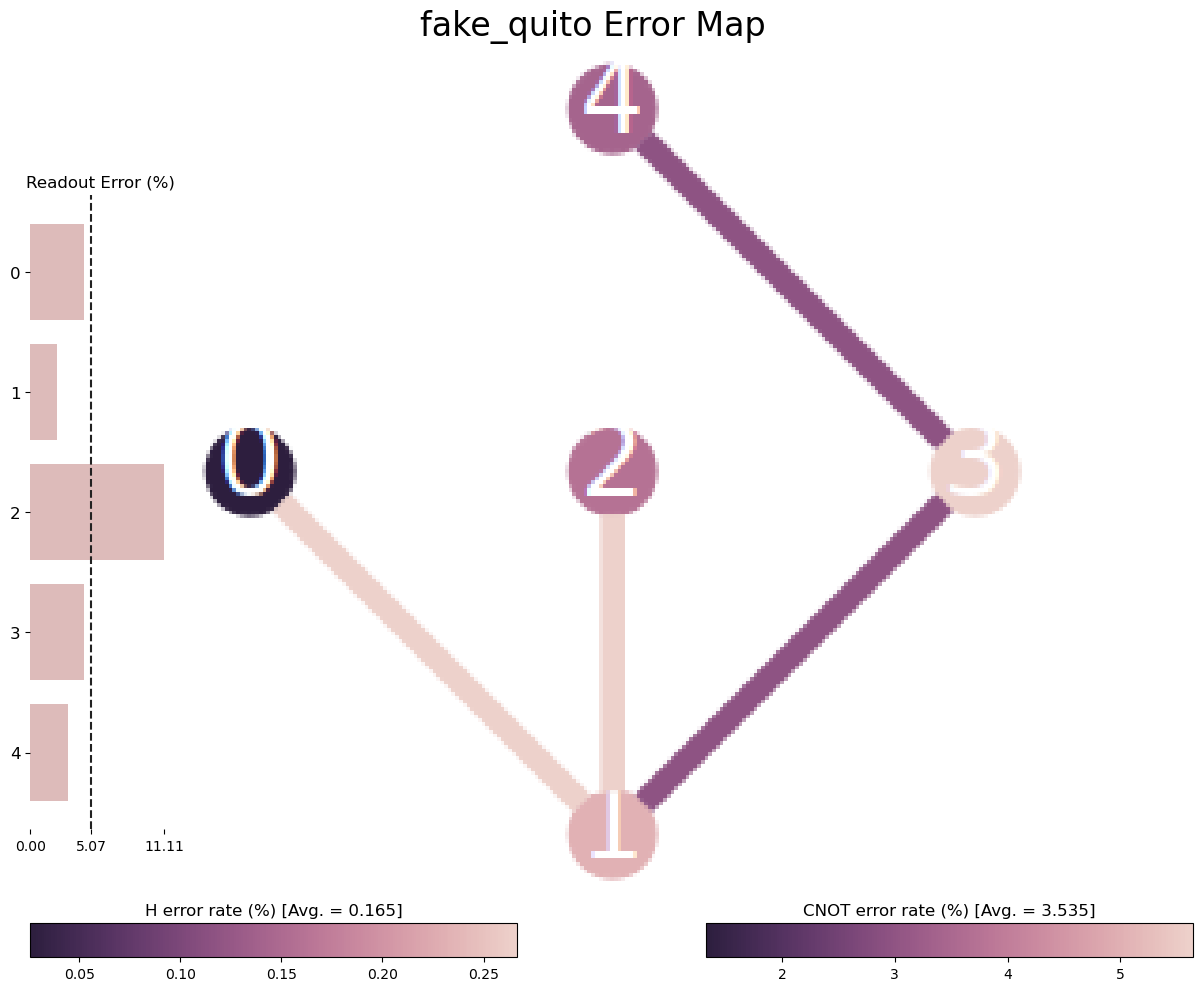

In [5]:
plot_error_map(backend)

In [7]:
print("file with Backend properties =",backend.props_filename)

file with Backend properties = props_quito.json


Model parameter

In [8]:
J = -1
hx = -1
hz = 0.5
bonds = [[0, 1],[1, 2],[1, 3],[3, 4]]

Some chosen values of the parameter. Later we will sample them randomly. 

In [9]:
geometry = "FakeQuito"
theta_Z_L_1 = [-1.0903836560221376]
theta_X_L_1 = [1.5707963013100128]
theta_ZZ_L_1 = [-1.290063556534689e-08]
initial_layout = [0, 1, 2, 3, 4] 

In [11]:
# vqe layer for FakeQuito geometry using all qubits and native connectivity
def vqeLayer_FakeQuito(theta_ZZ, theta_Z, theta_X, num_qubits = 5):
    vqeLayer = QuantumCircuit(num_qubits)

    bonds_1 = [[0, 1], [3, 4]]
    bonds_2 = [[1, 2]]
    bonds_3 = [[1, 3]]#

    vqeLayer.rz(theta_Z, range(num_qubits))
    vqeLayer.rx(theta_X, range(num_qubits))
    
    vqeLayer.cx(*zip(*[bonds_1[i] for i in range(len(bonds_1))]))
    vqeLayer.rz(theta_ZZ, [bonds_1[i][1] for i in range(len(bonds_1))])
    vqeLayer.cx(*zip(*[bonds_1[i] for i in range(len(bonds_1))]))

    vqeLayer.cx(*zip(*[bonds_2[i] for i in range(len(bonds_2))]))
    vqeLayer.rz(theta_ZZ, [bonds_2[i][1] for i in range(len(bonds_2))])
    vqeLayer.cx(*zip(*[bonds_2[i] for i in range(len(bonds_2))]))

    vqeLayer.cx(*zip(*[bonds_3[i] for i in range(len(bonds_3))]))
    vqeLayer.rz(theta_ZZ, [bonds_3[i][1] for i in range(len(bonds_3))])
    vqeLayer.cx(*zip(*[bonds_3[i] for i in range(len(bonds_3))]))

   
    vqeLayer.barrier()

    return vqeLayer



In [12]:

def makevqeCircuit_no_meas(theta_ZZ, theta_Z, theta_X, initial_layout = initial_layout):
    num_qubits = len(initial_layout)
    vqeCircuit = QuantumCircuit(num_qubits)
    for i in range(len(theta_ZZ)):
        vqeCircuit.h(range(num_qubits)) # initialize in the |+> state
        vqeCircuit.barrier()
        vqeL = vqeLayer_FakeQuito(theta_ZZ[i], theta_Z[i], theta_X[i], num_qubits)
        vqeCircuit = vqeCircuit.compose(vqeL)
    
    transpiled = transpile(vqeCircuit, backend, initial_layout = initial_layout)

    return transpiled

In [13]:
circuits_vqe_no_meas = [makevqeCircuit_no_meas(theta_ZZ_L_1, theta_Z_L_1, theta_X_L_1, initial_layout)]
circuits_vqe_no_meas[0].draw()

global phase: 3π/4
         ┌─────────┐┌────┐┌─────────┐ ░ ┌─────────────┐┌────┐┌─────────────┐»
q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤ Rz(0.48041) ├┤ √X ├┤ Rz(-1.5708) ├»
         ├─────────┤├────┤├─────────┤ ░ ├─────────────┤├────┤├─────────────┤»
q_1 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤ Rz(0.48041) ├┤ √X ├┤ Rz(-1.5708) ├»
         ├─────────┤├────┤├─────────┤ ░ ├─────────────┤├────┤├─────────────┤»
q_2 -> 2 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤ Rz(0.48041) ├┤ √X ├┤ Rz(-1.5708) ├»
         ├─────────┤├────┤├─────────┤ ░ ├─────────────┤├────┤├─────────────┤»
q_3 -> 3 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤ Rz(0.48041) ├┤ √X ├┤ Rz(-1.5708) ├»
         ├─────────┤├────┤├─────────┤ ░ ├─────────────┤├────┤├─────────────┤»
q_4 -> 4 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤ Rz(0.48041) ├┤ √X ├┤ Rz(-1.5708) ├»
         └─────────┘└────┘└─────────┘ ░ └─────────────┘└────┘└─────────────┘»
«         ┌────┐┌─────────┐                                  »
«q_0 -> 0 ┤ √X ├┤ Rz(π/2) ├──■───────────────────────■───────»
«         ├────┤├─────────┤┌─┴─┐┌─────────────────┐┌─┴─┐     »
«q_1 -> 1 ┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-1.2901e-08) ├┤ X ├──■──»
«         ├────┤├─────────┤└───┘└─────────────────┘└───┘┌─┴─┐»
«q_2 -> 2 ┤ √X ├┤ Rz(π/2) ├─────────────────────────────┤ X ├»
«         ├────┤├─────────┤                             └───┘»
«q_3 -> 3 ┤ √X ├┤ Rz(π/2) ├──■───────────────────────■───────»
«         ├────┤├─────────┤┌─┴─┐┌─────────────────┐┌─┴─┐     »
«q_4 -> 4 ┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-1.2901e-08) ├┤ X ├─────»
«         └────┘└─────────┘└───┘└─────────────────┘└───┘     »
«                                                               ░ 
«q_0 -> 0 ──────────────────────────────────────────────────────░─
«                                                               ░ 
«q_1 -> 1 ─────────────────────■────■───────────────────────■───░─
«         ┌─────────────────┐┌─┴─┐  │                       │   ░ 
«q_2 -> 2 ┤ Rz(-1.2901e-08) ├┤ X ├──┼───────────────────────┼───░─
«         └─────────────────┘└───┘┌─┴─┐┌─────────────────┐┌─┴─┐ ░ 
«q_3 -> 3 ────────────────────────┤ X ├┤ Rz(-1.2901e-08) ├┤ X ├─░─
«                                 └───┘└─────────────────┘└───┘ ░ 
«q_4 -> 4 ──────────────────────────────────────────────────────░─
«                                                               ░

In [14]:
### measurements 

circuits_vqe_w_meas = [makevqeCircuit_no_meas(theta_ZZ_L_1, theta_Z_L_1, theta_X_L_1, initial_layout)]
circuits_vqe_w_meas[0].measure_all() # Z basis measurement
circuits_vqe_w_meas[0].draw()

global phase: 3π/4
         ┌─────────┐┌────┐┌─────────┐ ░ ┌─────────────┐┌────┐┌─────────────┐»
q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤ Rz(0.48041) ├┤ √X ├┤ Rz(-1.5708) ├»
         ├─────────┤├────┤├─────────┤ ░ ├─────────────┤├────┤├─────────────┤»
q_1 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤ Rz(0.48041) ├┤ √X ├┤ Rz(-1.5708) ├»
         ├─────────┤├────┤├─────────┤ ░ ├─────────────┤├────┤├─────────────┤»
q_2 -> 2 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤ Rz(0.48041) ├┤ √X ├┤ Rz(-1.5708) ├»
         ├─────────┤├────┤├─────────┤ ░ ├─────────────┤├────┤├─────────────┤»
q_3 -> 3 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤ Rz(0.48041) ├┤ √X ├┤ Rz(-1.5708) ├»
         ├─────────┤├────┤├─────────┤ ░ ├─────────────┤├────┤├─────────────┤»
q_4 -> 4 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤ Rz(0.48041) ├┤ √X ├┤ Rz(-1.5708) ├»
         └─────────┘└────┘└─────────┘ ░ └─────────────┘└────┘└─────────────┘»
 meas: 5/═══════════════════════════════════════════════════════════════════»
                                                                            »
«         ┌────┐┌─────────┐                                  »
«q_0 -> 0 ┤ √X ├┤ Rz(π/2) ├──■───────────────────────■───────»
«         ├────┤├─────────┤┌─┴─┐┌─────────────────┐┌─┴─┐     »
«q_1 -> 1 ┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-1.2901e-08) ├┤ X ├──■──»
«         ├────┤├─────────┤└───┘└─────────────────┘└───┘┌─┴─┐»
«q_2 -> 2 ┤ √X ├┤ Rz(π/2) ├─────────────────────────────┤ X ├»
«         ├────┤├─────────┤                             └───┘»
«q_3 -> 3 ┤ √X ├┤ Rz(π/2) ├──■───────────────────────■───────»
«         ├────┤├─────────┤┌─┴─┐┌─────────────────┐┌─┴─┐     »
«q_4 -> 4 ┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-1.2901e-08) ├┤ X ├─────»
«         └────┘└─────────┘└───┘└─────────────────┘└───┘     »
« meas: 5/═══════════════════════════════════════════════════»
«                                                            »
«                                                               ░  ░ ┌─┐      »
«q_0 -> 0 ──────────────────────────────────────────────────────░──░─┤M├──────»
«                                                               ░  ░ └╥┘┌─┐   »
«q_1 -> 1 ─────────────────────■────■───────────────────────■───░──░──╫─┤M├───»
«         ┌─────────────────┐┌─┴─┐  │                       │   ░  ░  ║ └╥┘┌─┐»
«q_2 -> 2 ┤ Rz(-1.2901e-08) ├┤ X ├──┼───────────────────────┼───░──░──╫──╫─┤M├»
«         └─────────────────┘└───┘┌─┴─┐┌─────────────────┐┌─┴─┐ ░  ░  ║  ║ └╥┘»
«q_3 -> 3 ────────────────────────┤ X ├┤ Rz(-1.2901e-08) ├┤ X ├─░──░──╫──╫──╫─»
«                                 └───┘└─────────────────┘└───┘ ░  ░  ║  ║  ║ »
«q_4 -> 4 ──────────────────────────────────────────────────────░──░──╫──╫──╫─»
«                                                               ░  ░  ║  ║  ║ »
« meas: 5/════════════════════════════════════════════════════════════╩══╩══╩═»
«                                                                     0  1  2 »
«               
«q_0 -> 0 ──────
«               
«q_1 -> 1 ──────
«               
«q_2 -> 2 ──────
«         ┌─┐   
«q_3 -> 3 ┤M├───
«         └╥┘┌─┐
«q_4 -> 4 ─╫─┤M├
«          ║ └╥┘
« meas: 5/═╩══╩═
«          3  4

Printing the number of the count of the gates applied in the circuit and ciruit object

In [15]:
print("Quantum circuit as Class object of python",type(circuits_vqe_w_meas[0]))
print(f"Count the number of gates applied in the circuit as a ordered dictionary: {circuits_vqe_w_meas[0].count_ops()}")


Quantum circuit as Class object of python <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
Count the number of gates applied in the circuit as a ordered dictionary: OrderedDict({'rz': 29, 'sx': 15, 'cx': 8, 'measure': 5, 'barrier': 3})


### Task 1: Find out the count of 2-qubit gates applied between different qubit pairs  

#### Option 1

To extract this feature one could use the dictionary of instruction (shown below) where one can find which gates are applied to which qubits and then count them.

In [16]:
circuits_vqe_w_meas[0].__dict__["_data"]

# The above show which gate is applied on which qubit in the circuits. 

[CircuitInstruction(operation=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[1.5707963267948966]), qubits=(Qubit(QuantumRegister(5, 'q'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='sx', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[1.5707963267948966]), qubits=(Qubit(QuantumRegister(5, 'q'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[1.5707963267948966]), qubits=(Qubit(QuantumRegister(5, 'q'), 1),), clbits=()),
 CircuitInstruction(operation=Instruction(name='sx', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 1),), clbits=()),
 CircuitInstruction(operation=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[1.5707963267948966]), qubits=(Qubit(QuantumRegister(5, 'q'), 1),), clbits=()),
 CircuitInstruction(operatio

#### Option 2
This feature could be also be extracted by creating a DAGcircuit using circuit_to_dag method in qiskit which gives a acyclic graph object. 

## Noisy and ideal expectation values using quantum simulators

### Statevector Simulation-- Provide ideal expectations
To find the ideal expectation of the single weight Pauli observables such IIIIZ, ZIIII, etc, 

In [17]:
count_SV_Zbasis = Aer.get_backend('statevector_simulator').run(circuits_vqe_no_meas[0]).result().get_statevector()#.to_dict()


In [32]:
from qiskit.quantum_info.operators.symplectic import Pauli
op = Pauli('ZIIII')
opp = Pauli('IZIII')
ideal_exp_op = count_SV_Zbasis.expectation_value(op)
ideal_exp_opp = count_SV_Zbasis.expectation_value(opp)
print(count_SV_Zbasis.expectation_value(op))
print(count_SV_Zbasis.expectation_value(opp))

-0.886804284489118
-0.8868042844891177


### Noisy backend Simulations

In [20]:
shots = 10000
# On QASM simulator
count_QASM_Zbasis =Aer.get_backend('qasm_simulator').run(circuits_vqe_w_meas[0], shots=shots).result().get_counts()
# On noisy backend\
count_noisy_Zbasis =backend.run(circuits_vqe_w_meas[0], shots=shots).result().get_counts()



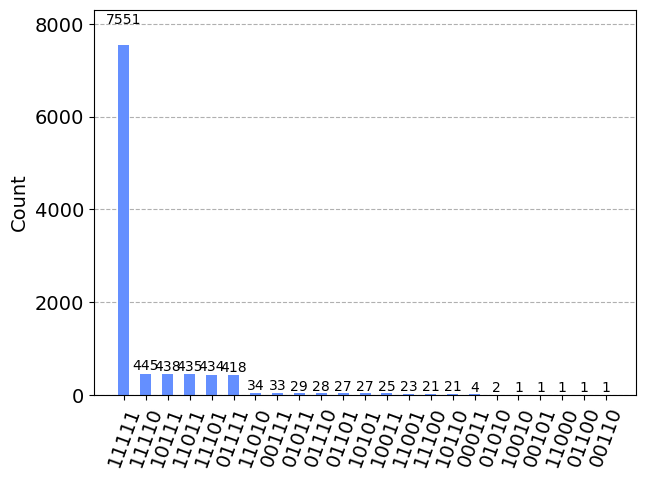

In [21]:
plot_histogram(count_QASM_Zbasis,sort='value_desc')


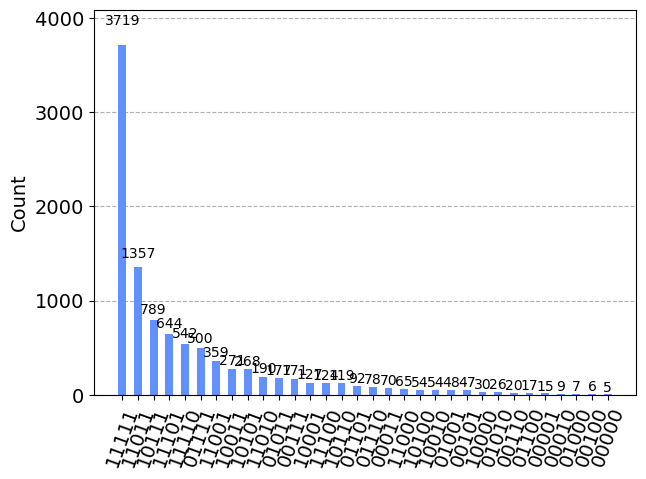

In [22]:
plot_histogram(count_noisy_Zbasis,sort='value_desc')

Below is the code to find the expectation value of the observables (here it is ZIIII and IZIII) from the counts obtained from the measurements.

In [28]:
num_qubits = 5
def expectation_value(count, meas_basis ='Z'):
    #tot_ZZIII = 0
    #tot_IZZII = 0
    #tot_IZIZI = 0
    #tot_IIIZZ = 0

    tot_ZIIII = 0
    tot_IZIII = 0
    tot_IIZII = 0
    tot_IIIZI = 0
    tot_IIIIZ = 0

    tot_XIIII = 0
    tot_IXIII = 0
    tot_IIXII = 0
    tot_IIIXI = 0
    tot_IIIIX = 0

    noisy_result_ZIIII =[]
    noisy_result_IZIII = []
    noisy_result_XIIII =[]
    noisy_result_IXIII = []
    
    count = {tuple(int(k) for k in key):count[key] for key in count.keys()}
    
    if meas_basis == "Z":
        for key in count.keys():
            # for ZZ observable
            #num_ZZIII = (-1)**key[4] * (-1)**key[3]
            #num_IZZII = (-1)**key[3] * (-1)**key[2]
            #num_IZIZI = (-1)**key[3] * (-1)**key[1]
            #num_IIIZZ = (-1)**key[1] * (-1)**key[0]

            num_ZIIII = (-1)**key[4] 
            num_IZIII = (-1)**key[3]
            #num_IIZII = (-1)**key[2] 
            #num_IIIZI = (-1)**key[1]
            #num_IIIIZ = (-1)**key[0]

            #tot_ZZIII += num_ZZIII*count[key]
            #tot_IZZII += num_IZZII*count[key]
            #tot_IZIZI += num_IZIZI*count[key]
            #tot_IIIZZ += num_IIIZZ*count[key]


            tot_ZIIII += num_ZIIII*count[key]
            tot_IZIII += num_IZIII*count[key]
            #tot_IIZII += num_IIZII*count[key]
            #tot_IIIZI += num_IIIZI*count[key]
            #tot_IIIIZ += num_IIIIZ*count[key]
            
            

        #noisy_result_Z.append((J*tot_ZZIII)/(shots))
        #noisy_result_Z.append((J*tot_IZZII)/(shots))
        #noisy_result_Z.append((J*tot_IZIZI)/(shots))
        #noisy_result_Z.append((J*tot_IIIZZ)/(shots))

        noisy_result_ZIIII.append((tot_ZIIII)/(shots))
        noisy_result_IZIII.append((tot_IZIII)/(shots))
        #noisy_result_Z.append((tot_IIZII)/(shots))
        #noisy_result_Z.append((tot_IIIZI)/(shots))
        #noisy_result_Z.append((tot_IIIIZ)/(shots))

        result = noisy_result_ZIIII,noisy_result_IZIII #sum(noisy_result_Z)
        #print("noisyZZ =",noisy_result_ZZ , "noisy Z =",noisy_result_Z)

    elif meas_basis =="X":
        for key in count.keys():
            num_XIIII = (-1)**key[0] 
            num_IXIII = (-1)**key[1]
            num_IIXII = (-1)**key[2] 
            num_IIIXI = (-1)**key[3]
            num_IIIIX = (-1)**key[4]

            tot_XIIII += num_XIIII*count[key]
            tot_IXIII += num_IXIII*count[key]
            tot_IIXII += num_IIXII*count[key]
            tot_IIIXI += num_IIIXI*count[key]
            tot_IIIIX += num_IIIIX*count[key]


        noisy_result_XIIII.append((hx*tot_XIIII)/(shots))
        noisy_result_IXIII.append((hx*tot_IXIII)/(shots))
        # noisy_result_X.append((hx*tot_IIXII)/(shots))
        # noisy_result_X.append((hx*tot_IIIXI)/(shots))
        # noisy_result_X.append((hx*tot_IIIIX)/(shots))
        #noisy_result_X = (hx*sum(tot_X))/(shots)
        result = noisy_result_XIIII, noisy_result_IXIII # sum(noisy_result_X)
    
    return result

In [30]:
resZ = expectation_value(count_QASM_Zbasis,meas_basis='Z')
resZ

([-0.889], [-0.893])

Comparision of the ideal and noisy expectation values

In [35]:
print(f"For ZIIII: the Ideal expectation = {ideal_exp_op} and Noisy expectation value = {resZ[0][0]}")
print(f"For IZIII: the Ideal expectation = {ideal_exp_opp} and Noisy expectation value = {resZ[1][0]}")

For ZIIII: the Ideal expectation = -0.886804284489118 and Noisy expectation value = -0.889
For IZIII: the Ideal expectation = -0.8868042844891177 and Noisy expectation value = -0.893
